# Feature Analysis

In [1]:
import pandas as pd
import math

In [2]:
#filenames1 = ['pionminus_new0','pionminus_new1','pionminus_new2','pionminus_new3','pionminus_new4','pionminus_new5']
filenames1 = ['pionminus_100M_v0','pionminus_100M_v1','pionminus_100M_v2','pionminus_100M_v3']
#filenames1 = ['antiproton_100M_v0','antiproton_100M_v0']
filenames2 = ['electron_50M_v0','electron_50M_v0']#'electron1'
#filenames1 = ['pionminus_100M_v0']
#filenames2 = ['electron_50M_v0']#'electron1'
filepath = "/home/yoren/bnl/PHENIX/ee/ML/"

hadron_weight = 25000*50/500
hadron_weight = 500
smear_e = 1

In [ ]:
if True:
    data1 = pd.read_csv(filepath+f'{filenames1[0]}.csv')
    data1['phi0'] = 0
    for ifile in range(1,len(filenames1)):
        idata = pd.read_csv(filepath+f'{filenames1[ifile]}.csv')
        idata['phi0'] = 0
        print(idata.shape[0])
        #idata = idata[:int(idata.shape[0]/6)]
        #print(idata.shape[0])
        data1 = pd.concat([data1,idata], sort=False)

    data2 = pd.read_csv(filepath+f'{filenames2[0]}.csv')
    data2['phi0'] = 1
    for ifile in range(1,len(filenames2)):
        idata = pd.read_csv(filepath+f'{filenames2[ifile]}.csv')
        idata['phi0'] = 1
        data2 = pd.concat([data2,idata], sort=False)

    data = pd.concat([data1,data2], sort=False)
    data = data[(data['pt'] > 0.4) & (data['pt'] < 25) & (data['n0'] > -1) & (data['e/p']>0.6) ]

    data = data.sample(frac = 1)
    

    data.head()

1068984
1069245
1005314


In [4]:
import numpy as np

if smear_e:
    r_dc = 220
    mom_scale  = 0.981  # B-field scale
    scale   = np.array([0.988, 0.990, 0.985, 0.981, 0.980, 0.985, 1.025, 1.023])
    smear_c1 = np.array([0.055, 0.066, 0.055, 0.059, 0.057, 0.056, 0.072, 0.072])
    smear_c2 = np.array([0.011, 0.017, 0.011, 0.013, 0.012, 0.012, 0.063, 0.062])

    n = len(data)
    rand = np.random.normal(size=n)

    # Randomly pick ONE index for the whole sample (as in your code).
    # If you meant one per row, see the note below.
    i = np.random.randint(0, 8)

    # Local (no temp column): e = (e/p)*p with p = pt * sqrt(z^2 + r^2)/r
    eoverp = data['e/p'].to_numpy()
    pt     = data['pt'].to_numpy()
    zed    = data['zdc'].to_numpy()

    # hypot is numerically stable for sqrt(zed**2 + r_dc**2)
    ecore = eoverp * pt * np.hypot(zed, r_dc) / r_dc

    # Avoid divide-by-zero in the smearing term
    eps = 1e-12
    smear_sigma = np.sqrt(smear_c1[i]**2 + (smear_c2[i] / np.sqrt(np.maximum(ecore, eps)))**2)

    # Apply momentum scale and e/p smearing (in-place on DataFrame)
    data['pt']  = mom_scale * data['pt']
    data['e/p'] = data['e/p'] / mom_scale * (1.0 + rand * smear_sigma)


In [ ]:
if True:
    data['disp2'] = data['n0']-data['disp']*data['disp']/8.
    data['emcdphi'] = (data['emcdphi'].abs() < 0.02).astype(np.int8)
    data['emcdz'] = ( (data['emcdz'] - 1).abs() < 8 ).astype(np.int8)
    data['centr+pt'] = data['centrality']/20.+data['pt']*data['pt']
    data['chi2/npe0'] = (data['chi2/npe0'].abs() < 10).astype(np.int8)

if False:
    data['disp2'] = data['n0']-data['disp']*data['disp']/8.
    data['centr+pt'] = data['centrality']/20.+data['pt']*data['pt']
    data['n0*pt'] = data['n0']+4*data['pt']
    data['e/p*pt'] = 1./((data['e/p']-0.9)*(data['e/p']-0.9)+0.25)/(1.25-data['prob'])+4*data['pt']
if False:
    data['disp2'] = data.apply(lambda row: row['n0']-row['disp']**2, axis=1)
    data['chi2/npe0'] = data.apply(lambda row: row['chi2']/(row['npe0']+0.001), axis=1)
    #data['e/p*prob'] = data.apply(lambda row:  1./(abs(row['e/p']-0.9)+0.25)/(1.25-row['prob']), axis=1)
    #data['n0*prob'] = data.apply(lambda row: (row['n0']-2)/(1.00001-row['prob']), axis=1)
    data['centr+pt'] = data.apply(lambda row: row['centrality']/20.+row['pt']*2, axis=1)
    data['e/p*pt'] = data.apply(lambda row: row['n0']+4*row['pt'], axis=1)
    data['n0*pt'] = data.apply(lambda row: 1./(abs(row['e/p']-0.9)+0.25)/(1.25-row['prob'])+4*row['pt'], axis=1)

In [6]:
if False:
    fliname_loc = 'TreenewDB'
    data = pd.read_csv(filepath+f'{fliname_loc}.csv')

In [7]:
#data = data[(data['centrality']<30)]

In [8]:
data.head()

,centrality,zdc,pt,e/p,n0,disp,chi2/npe0,npe0,prob,emcdphi,emcdz,phi0,disp2,centr+pt,n0*pt,e/p*pt
898572,14,-42.968750,0.970736,1.166413,1,5.276562,1,0,0.003149,1,1,0,-2.480263,1.642329,4.882945,6.381640
2737790,49,-24.234375,0.506289,1.029741,6,1.944252,1,11,0.367087,1,1,1,5.527486,2.706328,8.025156,6.269817
3808888,6,-44.750000,0.437447,1.239527,4,2.337724,1,8,0.036359,1,1,1,3.316881,0.491360,5.749788,4.005509
28944,9,6.265625,0.585605,0.854922,3,6.161411,1,3,0.085309,0,1,0,-1.745373,0.792934,5.342422,5.749120
769806,20,-41.000000,0.448358,1.037243,4,2.001433,1,10,0.929321,1,1,1,3.499283,1.201025,5.793431,13.393039


In [9]:
print(data.size, data.shape)

267490752 (16718172, 16)


In [10]:
# удалим лишние колонки
#data = data.drop(columns = ['zdc','emcdphi','emcdz'])
data = data.drop(columns = ['zdc','npe0'])

In [11]:
#filename2 = 'TreenewDB'#'electron1'
#data = pd.read_csv(filepath+f'{filename2}.csv')
#data = data.drop(columns = ['zvertex'])

In [ ]:
import matplotlib.pyplot as plt

def analysis(data: pd.DataFrame):
    fig, ax = plt.subplots(3, 3, figsize=(15, 6))
    for i, feature in enumerate(['centrality', 'pt', 'e/p', 'n0', 'disp', 'chi2/npe0', 'npe0', 'prob', 'phi0']):
        x, y = divmod(i, 3)
        data[feature].plot.hist(ax=ax[x][y], ylabel='', title=feature, color='skyblue', logy=True)



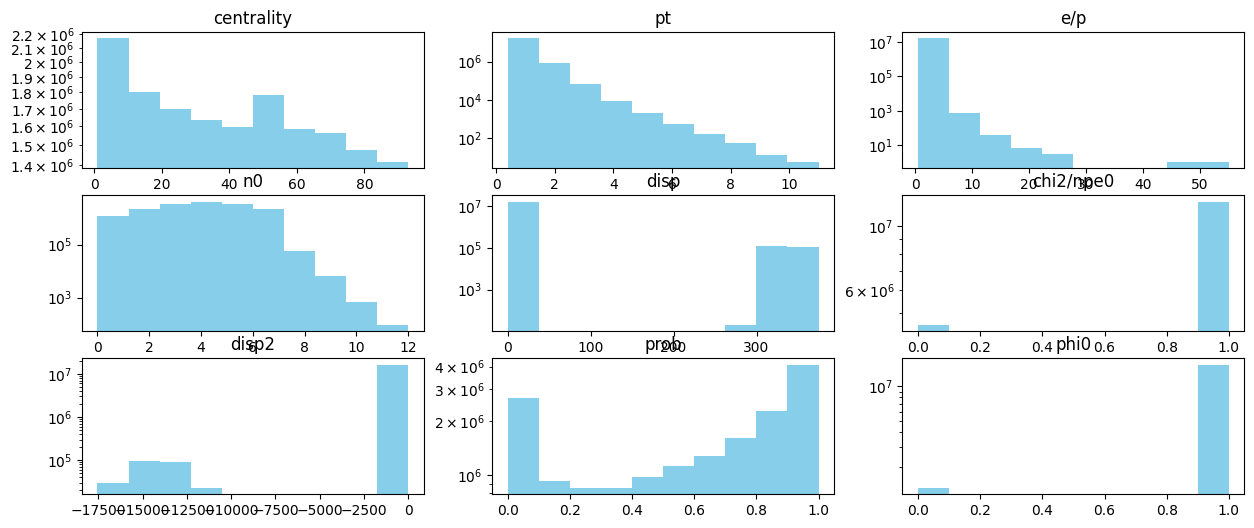

In [13]:
analysis(data)

+ Видим, что impressions имеют только одно значение, поэтому их можно удалить.
+ Таргет-переменная clicks сильно несбалансирована. Возможно, стоит использовать балансировку весов, а также в качестве оценки моделей использовать f1 и ROC AUC.
+ У campaign_clicks нулевых значений сильно больше, чем ненулевых, следовательно, можно трансформировать в бинарную фичу
+ os_id со значениями больше 6 встречается редко, можно объединить в одну категорию
+ Аналогично с редкими значениями zone_id

# Feature Engineering

In [14]:
def feature_engineering(data: pd.DataFrame) -> pd.DataFrame:
    # делим выборку на train и test
    #data = data.sort_values(by='date_time', ignore_index=True)
    #cut_off_val = data[data['date_time'] < pd.to_datetime('2021-10-01')].index[-1]
    #cut_off_test = data[data['date_time'] < pd.to_datetime('2021-10-02')].index[-1]

    cut_off_val =  int (data.shape[0]/3)
    cut_off_test = int (data.shape[0]/3*2 + 1)

    print(cut_off_val,cut_off_test)
    kek_data = data[cut_off_test:]
    y = data['phi0']
    data = data.drop(columns = ['phi0'])
    data_train, data_test = data[:cut_off_test], data[cut_off_test:]
    y_train, y_test = y.iloc[:cut_off_test], y.iloc[cut_off_test:]
    
    # делаем one hot encodings
    #enc = OneHotEncoder(drop='first', handle_unknown='ignore')
    #enc.fit(data_train)
    #transformed_train = enc.transform(data_train)
    #transformed_test = enc.transform(data_test)
    
    return data_train, data_test, y_train, y_test,cut_off_val, kek_data

In [15]:
X_train_all, X_test, y_train_all, y_test, cut_off_val, kek_data = feature_engineering(data)

5572724 11145449


In [16]:
X_test

,centrality,pt,e/p,n0,disp,chi2/npe0,prob,emcdphi,emcdz,disp2,centr+pt,n0*pt,e/p*pt
6030547,60,0.677978,0.942354,2,1.762324,1,0.940672,1,1,1.611777,3.459654,4.711912,15.551058
397087,40,0.487876,0.869632,2,5.577972,1,0.820271,1,1,-1.889221,2.238023,3.951505,11.225481
1253977,23,0.456349,0.999411,1,6.723781,1,0.489099,1,1,-4.651154,1.358255,2.825398,6.882419
9219382,74,1.028738,1.098663,1,5.869314,0,0.974040,1,1,-3.306106,4.758303,5.114953,16.633526
3062440,57,0.829477,0.990132,5,0.822453,1,0.791376,1,1,4.915446,3.538032,8.317909,11.765161
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192802,60,0.439741,0.881153,1,5.847833,0,0.553674,1,1,-3.274643,3.193372,2.758965,7.495253
154660,50,0.908440,0.967987,3,2.735541,0,0.942159,1,1,2.064602,3.325264,6.633761,16.391601
6084586,76,0.478741,0.977717,6,4.114538,1,0.900910,1,1,3.883822,4.029193,7.914963,13.103037
9284938,41,0.651198,0.924962,4,2.552499,1,0.350868,1,1,3.185594,2.474059,6.604793,7.042467


In [17]:
X_train, X_val = X_train_all, X_train_all[cut_off_val:]
y_train, y_val = y_train_all, y_train_all[cut_off_val:]
w_train, w_val = y_train-1, y_val-1
w_test = y_test-1
w_train_all = y_train_all - 1
w_train = w_train*(-hadron_weight)+1
w_val = w_val*(-hadron_weight)+1
w_test = w_test*(-hadron_weight)+1
w_train_all = w_train_all*(-hadron_weight)+1

+ Увидели, что количество кликов меняется в зависимости от дня недели и часа, добавим в качестве фичей
+ Также, добавим интеракции между этими двумя переменными, так как в разные дни недели разные часы могут по-разному влиять на колличество кликов
+ banner_id удалила, так как предполагаю, что модель должна уметь предсказывать клики для новых баннеров тоже.
+ Так как все оставшиеся фичи являются категориальными, сделали one-hot-encoding


+ В качестве теста берем последний день датасета, в качестве валидации -- предпоследний

# Create Model

In [18]:
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=2, learning_rate= 0.1, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train, y_train, w_train)

predicted = gb_clf.predict(X_test)

# calculating the main quality metrics
print(metrics.classification_report(y_test, predicted))

print('confusion matrix')
print(metrics.confusion_matrix(y_test, predicted))

/home/yoren/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yoren/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yoren/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.08      1.00      0.15    437546
           1       0.00      0.00      0.00   5135177

    accuracy                           0.08   5572723
   macro avg       0.04      0.50      0.07   5572723
weighted avg       0.01      0.08      0.01   5572723

confusion matrix
[[ 437546       0]
 [5135177       0]]


In [19]:
# search for parameters
# https://www.kaggle.com/hatone/gradientboostingclassifier-with-gridsearchcv
import time
from sklearn.model_selection import GridSearchCV

start = time.time() 

parameters = {
    "loss":["log_loss"],
    "learning_rate": [0.2],
    "min_samples_split": [0.01],
    "max_depth":[10],
    "max_features":["sqrt"],
    "criterion": ['squared_error'],
    "n_estimators":[10]
    }

classif = GradientBoostingClassifier()
classif.set_params(init='zero')

clf = GridSearchCV(classif, parameters, cv=3, n_jobs=3)

clf.fit(X_train, y_train, sample_weight=w_train)
print('точность: ', clf.score(X_test, y_test))

# getting the best parameters ans score
print(clf.best_params_)
print(clf.best_score_)

stop = time.time()    
print('time of execution (sec)', stop - start)

точность:  0.5229081007615128
{'criterion': 'squared_error', 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 0.01, 'n_estimators': 10}
0.5264780269736219
time of execution (sec) 637.624977350235


# Cross Validation

In [20]:
predicted = clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.14      1.00      0.25    437546
           1       1.00      0.48      0.65   5135177

    accuracy                           0.52   5572723
   macro avg       0.57      0.74      0.45   5572723
weighted avg       0.93      0.52      0.62   5572723



   feature  importance
     disp2    0.175938
centrality    0.166487
  centr+pt    0.146603
       e/p    0.131858
      disp    0.077540
        n0    0.076960
    e/p*pt    0.061052
      prob    0.060263
 chi2/npe0    0.035065
     n0*pt    0.028118
   emcdphi    0.017633
     emcdz    0.015194
        pt    0.007289


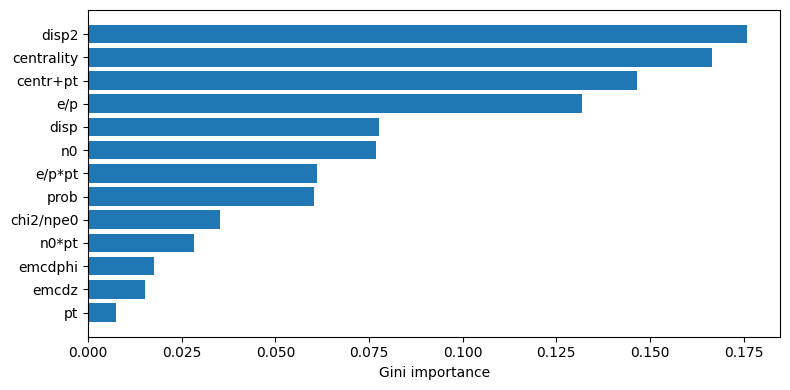

   feature  perm_importance_mean  perm_importance_std
     disp2              0.006046             0.000074
  centr+pt              0.003052             0.000040
       e/p              0.002679             0.000075
centrality              0.001856             0.000050
      prob              0.001107             0.000018
 chi2/npe0              0.000802             0.000047
    e/p*pt              0.000701             0.000015
      disp              0.000458             0.000045
        n0              0.000292             0.000023
   emcdphi              0.000241             0.000007
     emcdz              0.000229             0.000007
     n0*pt              0.000167             0.000020
        pt              0.000091             0.000004


In [21]:
# --- Feature importance (tree-based GBDT) ---
feat_names = X_train.columns
gb_best = clf.best_estimator_          # GradientBoostingClassifier
imp = gb_best.feature_importances_

import pandas as pd
fi_df = pd.DataFrame({'feature': feat_names, 'importance': imp})
fi_df = fi_df.sort_values('importance', ascending=False)
print(fi_df.to_string(index=False))

# Optional: bar plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.barh(fi_df.feature[::-1], fi_df.importance[::-1])
plt.xlabel("Gini importance")
plt.tight_layout()
plt.show()

# --- Permutation importance (more reliable, model-agnostic) ---
from sklearn.inspection import permutation_importance
pi = permutation_importance(gb_best, X_test, y_test,
                            n_repeats=5, random_state=42,
                            n_jobs=3, sample_weight=w_test)
pi_df = pd.DataFrame({'feature': feat_names,
                      'perm_importance_mean': pi.importances_mean,
                      'perm_importance_std': pi.importances_std})
pi_df = pi_df.sort_values('perm_importance_mean', ascending=False)
print(pi_df.to_string(index=False))

In [22]:
y_pred_probs = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

# Model Evaluation

log loss: 0.1002115146395304
roc auc: 0.9667001443020692
f1 score: 0.939105292790424


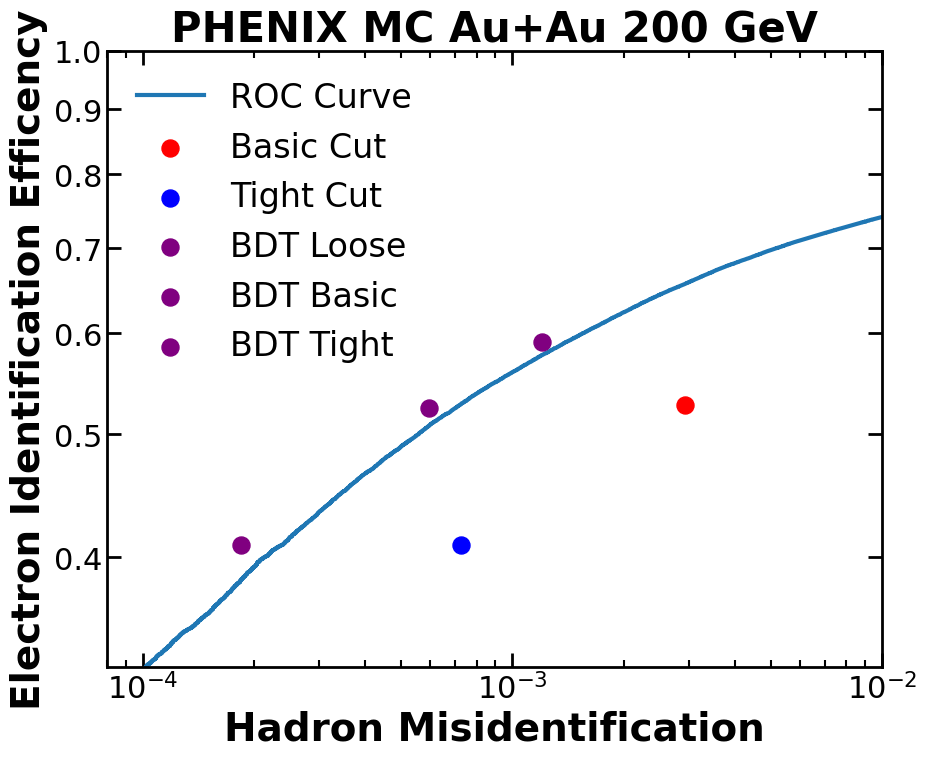

In [23]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_auc_score, log_loss, f1_score
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

print('log loss:', log_loss(y_test, y_pred_probs, sample_weight=w_test))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs[:, 1], pos_label=1, sample_weight=w_test)
metrics.auc(fpr, tpr)
print('roc auc:', metrics.auc(fpr, tpr))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
y_pred_opt = y_pred_probs[:, 1] > optimal_threshold
print('f1 score:', f1_score(y_test, y_pred_opt))

# Plot ROC curve
plt.figure(figsize=(10, 8))

rej = 25/2
eff = 0.8

fpr = fpr / rej
tpr = tpr *eff
# Plot curves with increased line width
plt.plot(fpr, tpr, label='ROC Curve', linewidth=3)
#plt.plot(fpr, fpr, label='Random Guess', linestyle='--', linewidth=3)

# Add larger points to the plot  # Increased size with `s`
plt.scatter(1/1.5/rej*0.055, eff*0.659, color='red', label='Basic Cut', s=150, zorder=5)
plt.scatter(1/1.5/rej*0.0136, eff*0.511, color='blue', label='Tight Cut', s=150, zorder=5)
plt.scatter(1/rej*0.0150, eff*0.738, color='purple', label='BDT Loose', s=150, zorder=5)
plt.scatter(1/rej*0.00745, eff*0.655, color='purple', label='BDT Basic', s=150, zorder=5)
plt.scatter(1/rej*0.0023, eff*0.511, color='purple', label='BDT Tight', s=150, zorder=5)

# Set both axes to logarithmic scale
plt.xscale('log')
plt.yscale('log')

# Set the same range for both axes
plt.xlim(1e-3/rej, 1/100)
plt.ylim(0.41*eff, 1*eff)

# Customize y-axis ticks explicitly
y_ticks = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
plt.yticks(y_ticks, fontsize=22)

# Disable scientific notation on the y-axis
ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.get_major_formatter().set_useOffset(False)
ax.yaxis.get_major_formatter().set_scientific(False)

# Enable minor ticks and customize tick size
plt.minorticks_on()
ax.tick_params(axis='both', which='major', length=10, width=2, labelsize=22, direction='in', top=True, right=True)  # Major ticks
ax.tick_params(axis='both', which='minor', length=5, width=1.5, direction='in', top=True, right=True)  # Minor ticks

# Add labels with larger font size
plt.xlabel("Hadron Misidentification", fontsize=28, fontweight='bold')
plt.ylabel("Electron Identification Efficency", fontsize=28, fontweight='bold')
plt.xticks(fontsize=22)
plt.title('PHENIX MC Au+Au 200 GeV', fontsize=30, fontweight='bold')

# Customize legend with larger font size and no box
plt.legend(fontsize=24, loc='upper left', frameon=False)

# Thicker plot frame
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)

# Save the plot with a transparent background
plt.savefig("output/roc_auc_curve_new.pdf", bbox_inches='tight', transparent=True)

# Show the plot
plt.show()

log loss: 0.1002115146395304
roc auc: 0.9667001443020692
f1 score: 0.939105292790424


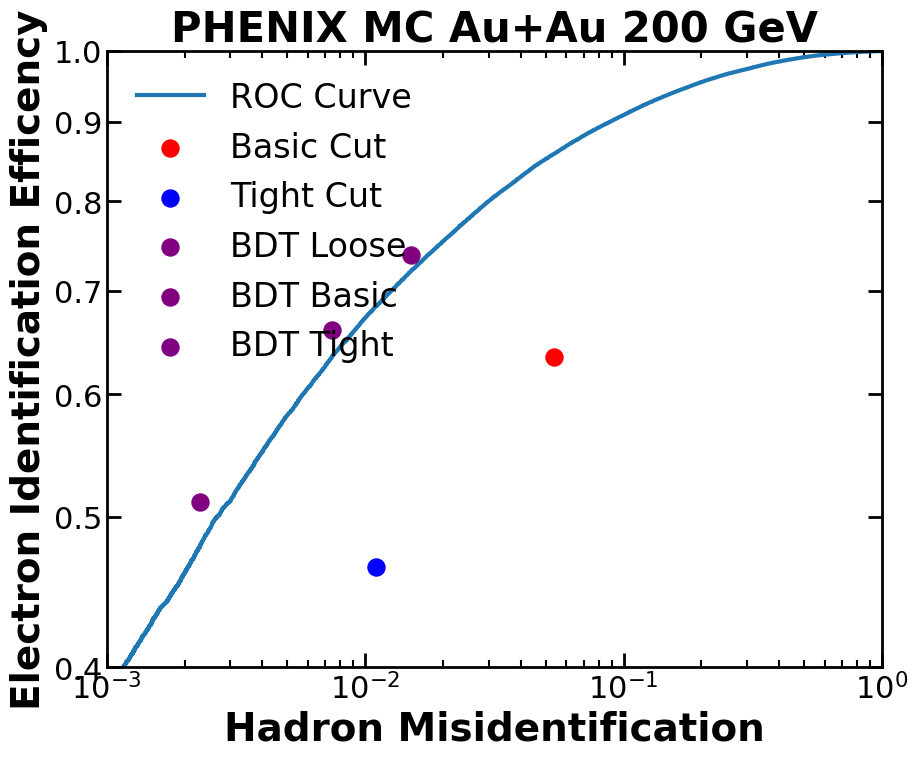

In [24]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_auc_score, log_loss, f1_score
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

print('log loss:', log_loss(y_test, y_pred_probs, sample_weight=w_test))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs[:, 1], pos_label=1, sample_weight=w_test)
metrics.auc(fpr, tpr)
print('roc auc:', metrics.auc(fpr, tpr))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
y_pred_opt = y_pred_probs[:, 1] > optimal_threshold
print('f1 score:', f1_score(y_test, y_pred_opt))

# Plot ROC curve
plt.figure(figsize=(10, 8))

rej = 1
eff = 1

fpr = fpr / rej
tpr = tpr *eff
# Plot curves with increased line width
plt.plot(fpr, tpr, label='ROC Curve', linewidth=3)
#plt.plot(fpr, fpr, label='Random Guess', linestyle='--', linewidth=3)

# Add larger points to the plot  # Increased size with `s`
plt.scatter(1/rej*0.054, eff*0.634, color='red', label='Basic Cut', s=150, zorder=5)
plt.scatter(1/rej*0.011, eff*0.464, color='blue', label='Tight Cut', s=150, zorder=5)
plt.scatter(1/rej*0.0150, eff*0.738, color='purple', label='BDT Loose', s=150, zorder=5)
plt.scatter(1/rej*0.00745, eff*0.66, color='purple', label='BDT Basic', s=150, zorder=5)
plt.scatter(1/rej*0.0023, eff*0.511, color='purple', label='BDT Tight', s=150, zorder=5)

# Set both axes to logarithmic scale
plt.xscale('log')
plt.yscale('log')

# Set the same range for both axes
plt.xlim(1e-3/rej, 1/rej/rej**0.5)
plt.ylim(0.41*eff, 1*eff)

# Customize y-axis ticks explicitly
y_ticks = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
plt.yticks(y_ticks, fontsize=22)

# Disable scientific notation on the y-axis
ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.get_major_formatter().set_useOffset(False)
ax.yaxis.get_major_formatter().set_scientific(False)

# Enable minor ticks and customize tick size
plt.minorticks_on()
ax.tick_params(axis='both', which='major', length=10, width=2, labelsize=22, direction='in', top=True, right=True)  # Major ticks
ax.tick_params(axis='both', which='minor', length=5, width=1.5, direction='in', top=True, right=True)  # Minor ticks

# Add labels with larger font size
plt.xlabel("Hadron Misidentification", fontsize=28, fontweight='bold')
plt.ylabel("Electron Identification Efficency", fontsize=28, fontweight='bold')
plt.xticks(fontsize=22)
plt.title('PHENIX MC Au+Au 200 GeV', fontsize=30, fontweight='bold')

# Customize legend with larger font size and no box
plt.legend(fontsize=24, loc='upper left', frameon=False)

# Thicker plot frame
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)

# Save the plot with a transparent background
plt.savefig("output/roc_auc_curve_new_centr.pdf", bbox_inches='tight', transparent=True)

# Show the plot
plt.show()

In [25]:
pred_baseline = np.ones_like(y_test) * y_test.mean()
print("baseline auc:", roc_auc_score(y_test, pred_baseline))
print("baseline log_loss:", log_loss(y_test, pred_baseline))

baseline auc: 0.5
baseline log_loss: 0.27512903445630044


In [26]:
i = 240000
print(round(fpr[i],3),round(tpr[i],4))
print(thresholds[i],fpr[i],tpr[i])
#print((fpr[i]/tpr[i]*data1.shape[0]/data2.shape[0]/10)**-1,(fpr[i]/1.*data1.shape[0]/data2.shape[0]/10)**-1)

0.004 0.5581
0.37744761515748204 0.004200701183418429 0.5580637239962712


In [27]:
print(sum(predicted),len(predicted))

2478524 5572723


In [28]:
#kek_data = data
#kek_data = kek_data.drop(columns = ['phi0'])
proba_loc = clf.predict_proba(X_test)
print(proba_loc[0][1])

0.5013805364349846


In [29]:
import ROOT as root
outfile = root.TFile.Open("output/BDT_test1.root", "recreate")
e_pt_hist_AI = root.TH2D("e_pt_hist_AI", "e_pt_hist_AI", 20, 0, 5, 10, 0, 100)
h_pt_hist_AI = root.TH2D("h_pt_hist_AI", "h_pt_hist_AI", 20, 0, 5, 10, 0, 100)
e_pt_hist_SC = root.TH2D("e_pt_hist_SC", "e_pt_hist_SC", 20, 0, 5, 10, 0, 100)
e_pt_hist_TC = root.TH2D("e_pt_hist_TC", "e_pt_hist_TC", 20, 0, 5, 10, 0, 100)
h_pt_hist_SC = root.TH2D("h_pt_hist_SC", "h_pt_hist_SC", 20, 0, 5, 10, 0, 100)
h_pt_hist_TC = root.TH2D("h_pt_hist_TC", "h_pt_hist_TC", 20, 0, 5, 10, 0, 100)
e_pt_hist_NC = root.TH2D("e_pt_hist_NC", "e_pt_hist_NC", 20, 0, 5, 10, 0, 100)
h_pt_hist_NC = root.TH2D("h_pt_hist_NC", "h_pt_hist_NC", 20, 0, 5, 10, 0, 100)

Welcome to JupyROOT 6.30/06


In [30]:
mycute,mycuth,tcute,tcuth, AIcute, AIcuth = 0, 0, 0, 0, 0, 0
norm_e, norm_h = 0, 0
data0 = kek_data.reset_index()  # make sure indexes pair with number of rows

counter =-1
for index, row in data0.iterrows():
    counter+=1
    if counter>10000000: break
    centrality, pt, ep, n0, disp, chi2, npe0, prob, phi0 = row['centrality'], row['pt'], row['e/p'], row['n0'], row['disp'], row['chi2/npe0'], row['n0'], row['prob'], row['phi0']
    if pt<0.4 or centrality<0: continue
    if phi0: e_pt_hist_NC.Fill(pt,centrality)
    else:    h_pt_hist_NC.Fill(pt,centrality)
    if ep>0.8 and n0>=2 and disp <5 and chi2<10: 
        if phi0: 
            mycute+=1
            e_pt_hist_SC.Fill(pt,centrality)
        else: 
            mycuth+=1+hadron_weight
            h_pt_hist_SC.Fill(pt,centrality)

    if ep>0.8 and n0>=2 + disp**2/8 and disp <4 and prob>0.01 and chi2<10: 
        if phi0: 
            tcute+=1
            e_pt_hist_TC.Fill(pt,centrality)
        else: 
            tcuth+=1+hadron_weight
            h_pt_hist_TC.Fill(pt,centrality)
    if proba_loc[counter][1]>thresholds[i]: 
        if phi0: 
            AIcute+=1
            e_pt_hist_AI.Fill(pt,centrality)
        else: 
            AIcuth+=1+hadron_weight
            h_pt_hist_AI.Fill(pt,centrality)
    if phi0: norm_e+=1
    else: norm_h+=1+hadron_weight
    #if counter<10: 
    #    print(proba_loc[counter],answer(centrality,pt,ep,n0,disp,chi2,npe0,prob))
        #print(centrality, pt, ep, n0, disp, chi2, npe0, prob, phi0 )

In [31]:
print(norm_e, norm_h, round(mycute/norm_e,3),round(mycuth/norm_h,3),round(tcute/norm_e,3),round(tcuth/norm_h,4), round(AIcute/norm_e,3), round(AIcuth/norm_h,3), round(AIcuth/AIcute/norm_h*norm_e,3),round(fpr[i],3),round(tpr[i],3))

5033447 213676500 0.809 0.123 0.577 0.0224 0.561 0.004 0.008 0.004 0.558


In [32]:
print(round(AIcute/mycute/(AIcuth/mycuth),3),round(AIcute/mycute,3),round(AIcuth/mycuth,3), round(30*AIcute/norm_e/AIcuth*norm_h), counter)

20.168 0.693 0.034 3969 5572722


In [33]:
%run input/Format.ipynb
%jsroot on

/home/yoren/.local/lib/python3.10/site-packages/nbformat/__init__.py:96: MissingIDFieldWarning: Cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


In [34]:
c1 = root.TCanvas("c1","c1",1400,2500)
c1.Divide(2,5)
part_names_legend= [ "prompt e^{-} " , "#gamma#rightarrow e^{-} "]
centralities_legend = ["0-20%","20-40%","40-60%","60-80%","80-93%"]
legends = []
for icentr in range(5):

    c1.cd(1+2*icentr)
    root.gPad.SetLogy()
    e_pt_hist_NC.ProjectionX(f"e_pt_hist_NC_{icentr}").SetLineWidth(312)
    e_pt_hist_SC.ProjectionX(f"e_pt_hist_SC_{icentr}").SetLineWidth(3)
    e_pt_hist_AI.ProjectionX(f"e_pt_hist_AI_{icentr}").SetLineWidth(3)
    e_pt_hist_NC.SetLineColor(4)
    e_pt_hist_SC.SetLineColor(2)
    e_pt_hist_AI.SetLineColor(1)
    proj = e_pt_hist_NC.ProjectionX(f"e_pt_hist_NC_{icentr}",2*icentr+1,2*icentr+2)
    proj.SetMinimum(2)
    Format_Hist_total(proj, title_x="p_{T} [GeV]",  title_y="dN/dp_{T}", left=0.15, bottom=0.15, right=0.01, top=0.01,  Tsize=0.07,  Lsize=0.06,\
                      Mstyle=21,  Msize=2, Mcolor=4,  Lwidth=3,  Lcolor=4,  offset_x=1, offset_y=1, title="",  Malpha=1,  Lalpha=1)
    proj.Draw()
    phoj_s = e_pt_hist_SC.ProjectionX(f"e_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2)
    phoj_s.Draw("same")
    e_pt_hist_AI.ProjectionX(f"e_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2).Draw("same")

    legends.append(Draw_Legend_Title(0.65,0.65,0.95,0.95,part_names_legend[0]+centralities_legend[icentr],TextSize=0.08, align =22, LineWidth=0, Color=1,  alpha=0))
    legends[-1].AddEntry(phoj_s,"std","l")
    legends[-1].AddEntry(e_pt_hist_AI.ProjectionX(f"e_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2),"bdt","l")
    legends[-1].Draw()

    c1.cd(2+2*icentr)
    root.gPad.SetLogy()
    h_pt_hist_NC.ProjectionX(f"h_pt_hist_NC_{icentr}").SetLineWidth(3)
    h_pt_hist_SC.ProjectionX(f"h_pt_hist_SC_{icentr}").SetLineWidth(3)
    h_pt_hist_AI.ProjectionX(f"h_pt_hist_AI_{icentr}").SetLineWidth(3)
    h_pt_hist_NC.SetLineColor(4)
    h_pt_hist_SC.SetLineColor(2)
    h_pt_hist_AI.SetLineColor(1)
    projh = h_pt_hist_NC.ProjectionX(f"h_pt_hist_NC_{icentr}",2*icentr+1,2*icentr+2)
    Format_Hist_total(projh, title_x="p_{T} [GeV]",  title_y="dN/dp_{T}", left=0.15, bottom=0.15, right=0.01, top=0.01,  Tsize=0.07,  Lsize=0.06,\
                      Mstyle=21,  Msize=2, Mcolor=4,  Lwidth=3,  Lcolor=4,  offset_x=1, offset_y=1, title="",  Malpha=1,  Lalpha=1)
    projh.SetMinimum(2)
    projh.Draw()
    phoj_sd = h_pt_hist_SC.ProjectionX(f"h_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2)
    phoj_sd.Draw("same")
    h_pt_hist_AI.ProjectionX(f"h_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2).Draw("same")

    legends.append(Draw_Legend_Title(0.7,0.65,0.95,0.95,part_names_legend[1]+centralities_legend[icentr],TextSize=0.08, align =22, LineWidth=0, Color=1,  alpha=0))
    legends[-1].AddEntry(phoj_sd,"std","l")
    legends[-1].AddEntry(h_pt_hist_AI.ProjectionX(f"h_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2),"bdt","l")
    legends[-1].Draw()
c1.Draw()
print(h_pt_hist_NC.GetBinContent(10,1),e_pt_hist_NC.GetBinContent(10,1))

185.0 1665.0


In [35]:
if False:
    e_pt_hist_AI.Write()
    h_pt_hist_AI.Write()
    e_pt_hist_SC.Write()
    h_pt_hist_SC.Write()
    e_pt_hist_NC.Write()
    h_pt_hist_NC.Write()
    outfile.Close()

In [36]:
import pickle
with open('output/bdtasdfs.pkl','wb') as f:
    pickle.dump(clf,f)

#print(clf.predict(X_test[0:10]))

In [37]:
import pickle
# load
with open('output/bdtasdfs.pkl', 'rb') as f:
    clf2 = pickle.load(f)
print(clf2.predict(X_test[0:10]))

[1 0 0 0 1 1 1 1 1 0]


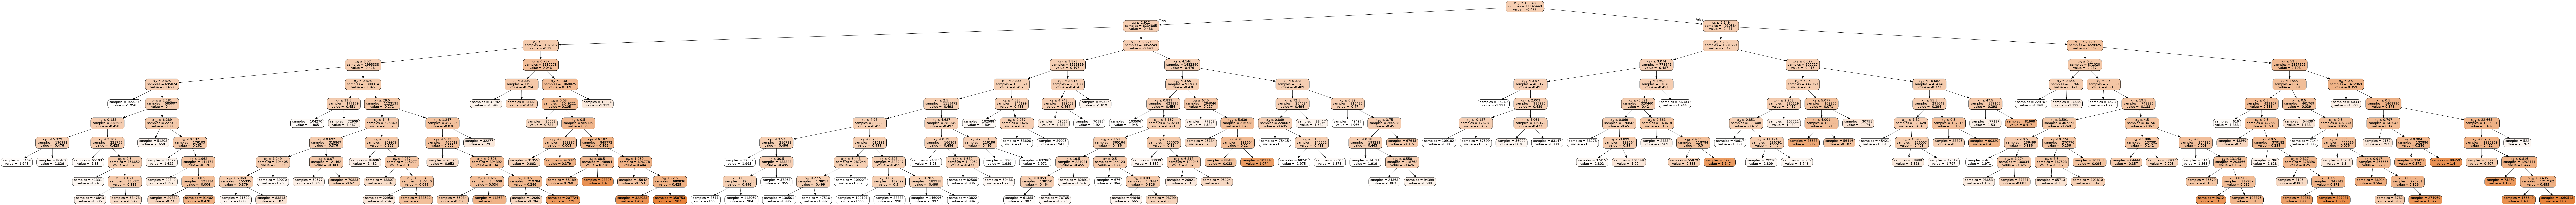

In [38]:
sub_tree_42 = clf2.best_estimator_[0, 0]
from sklearn.tree import export_graphviz, export_text
from sklearn.tree import _tree
# Visualization
# Install graphviz: https://www.graphviz.org/download/
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(
    sub_tree_42,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False, # enable them if you want
)

graph = graph_from_dot_data(dot_data)
png = graph.create_png()
# Save (optional)
from pathlib import Path
Path('output/out.png').write_bytes(png)
# Display
Image(png)

In [39]:
clf2.predict(X_test[0:100])

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0])

In [40]:
clf2.predict_proba(X_test[0:100])

array([[0.49861946, 0.50138054],
       [0.92415502, 0.07584498],
       [0.93390728, 0.06609272],
       [0.80570931, 0.19429069],
       [0.10742041, 0.89257959],
       [0.14557582, 0.85442418],
       [0.27641473, 0.72358527],
       [0.11867625, 0.88132375],
       [0.07895004, 0.92104996],
       [0.93607248, 0.06392752],
       [0.4409132 , 0.5590868 ],
       [0.18178479, 0.81821521],
       [0.13564967, 0.86435033],
       [0.14919647, 0.85080353],
       [0.22253565, 0.77746435],
       [0.91709561, 0.08290439],
       [0.89268009, 0.10731991],
       [0.90899158, 0.09100842],
       [0.09185393, 0.90814607],
       [0.42648499, 0.57351501],
       [0.12527323, 0.87472677],
       [0.27785887, 0.72214113],
       [0.12949672, 0.87050328],
       [0.52825687, 0.47174313],
       [0.08990449, 0.91009551],
       [0.43491279, 0.56508721],
       [0.09150911, 0.90849089],
       [0.67607024, 0.32392976],
       [0.0801231 , 0.9198769 ],
       [0.16574701, 0.83425299],
       [0.

In [41]:
print( clf2.best_params_)

{'criterion': 'squared_error', 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 0.01, 'n_estimators': 10}


In [42]:
clf2.best_estimator_.predict_proba(X_test[9:20])

array([[0.93607248, 0.06392752],
       [0.4409132 , 0.5590868 ],
       [0.18178479, 0.81821521],
       [0.13564967, 0.86435033],
       [0.14919647, 0.85080353],
       [0.22253565, 0.77746435],
       [0.91709561, 0.08290439],
       [0.89268009, 0.10731991],
       [0.90899158, 0.09100842],
       [0.09185393, 0.90814607],
       [0.42648499, 0.57351501]])

In [43]:
y = clf2.best_estimator_[0, 0].predict(X_test[9:19].values.tolist())*0
#y = gb_clf.decision_function(X_test[9:20])

rate = clf2.best_params_['learning_rate']
print(rate)
for i in range(0,10):
    sub_tree = clf2.best_estimator_[i, 0]
    y += rate*sub_tree.predict(X_test[9:19].values.tolist())
print(y)
print(gb_clf.decision_function(X_test[9:20]))
z=y
for i in range(len(z)): 
    z[i] = 1./(1+np.exp(-z[i]))
print(z)

0.2
[-2.68394294  0.2374567   1.5043019   1.85190255  1.74091723  1.25095045
 -2.40352366 -2.11841409 -2.30138379  2.29120566]
[-3.86699405 -1.36836349 -1.36836349 -2.89091191 -0.80991742 -2.89091191
 -3.21744112 -3.86699405 -3.68076489 -0.80991742 -3.21744112]
[0.06392752 0.5590868  0.81821521 0.86435033 0.85080353 0.77746435
 0.08290439 0.10731991 0.09100842 0.90814607]


In [44]:
best_gbc = clf2.best_estimator_

In [45]:
n_estim = best_gbc.n_estimators

In [46]:
learning_rate = best_gbc.learning_rate
print(clf2.decision_function(X_test[9:19]))
arr = clf2.decision_function(X_test[9:19])
print(1./(1.+np.exp(-arr)))
#tree_scores = [best_gbc.estimators_[i, 0].decision_function(X_test[9:19].values.tolist()) for i in range(10)]
print(learning_rate)

[-2.68394294  0.2374567   1.5043019   1.85190255  1.74091723  1.25095045
 -2.40352366 -2.11841409 -2.30138379  2.29120566]
[0.06392752 0.5590868  0.81821521 0.86435033 0.85080353 0.77746435
 0.08290439 0.10731991 0.09100842 0.90814607]
0.2


In [47]:
log_odds_predictions = []
for tree in clf2.best_estimator_:
    # For each tree, get the predicted values for each sample
    leaf_indices = tree[0].apply(X_test[9:19].values.tolist())  # Get the leaf indices for the training data
    leaf_values = tree[0].tree_.value  # Get the values at each leaf

    # Average the values for each leaf to interpret them as log odds
    predicted_log_odds = [leaf_values[leaf_indices[i]].mean() for i in range(len(X_test[9:19]))]
    log_odds_predictions.append(predicted_log_odds)

In [48]:
print(log_odds_predictions)

[[-1.9973551529578482, -1.5944765378441244, 1.4003026701664687, 1.3471895369121591, 1.8754953116134756, 1.4943554097720189, -1.825655024936042, -1.809155792263621, -1.9751488786403517, 1.8754953116134756], [-1.6687074279927827, 1.568092817706514, 0.9471481799615721, 0.907109443830651, 1.4868010285316862, 0.49110775003239326, -1.6148174188265987, -1.3770453685191668, -1.556081801492982, 1.6569465342313536], [-1.4785598769227979, 0.8263038819445394, 1.2867786188961274, 1.3422941655760725, 0.6451864046132344, 0.9931579984555031, -1.4343313531275013, -1.3622577003590866, -1.4167768121499253, 1.3915323666680797], [-1.3550780050686762, 1.222333391374252, 1.222333391374252, 1.076847177559258, 0.5830658840041558, 0.8077014804628851, -1.2882471962823563, -1.214440347693146, -1.2792960511045828, 1.2857449144832673], [-1.269478378782583, -0.8778649701500555, 0.9210656386088151, 0.9350310308612548, 0.9942371498606452, 0.9350310308612548, -1.1959475070984906, -1.133357264931776, -1.0336698104373037

In [49]:
rate = clf2.best_params_['learning_rate']
myarr = [log_odds_predictions[i][0] for i in range(10)]
print(rate,rate*sum(myarr))
print(clf2.decision_function(X_test[9:19]))

0.2 -2.683942942885345
[-2.68394294  0.2374567   1.5043019   1.85190255  1.74091723  1.25095045
 -2.40352366 -2.11841409 -2.30138379  2.29120566]


In [50]:
print(best_gbc.estimators_.shape[0])
print(best_gbc.estimators_.shape[1])
y = []
for i in range(10):
    y0=[]
    for j in range(n_estim):
        sub_tree = clf2.best_estimator_[j, 0]
        y0.append(sub_tree.predict(X_test[9+i:10+i].values.tolist())[0])
    y.append(y0)
print(y)

10
1
[[-1.9973551529578482, -1.6687074279927827, -1.4785598769227979, -1.3550780050686762, -1.269478378782583, -1.1996115645579446, -1.1570676322887408, -1.1246907455814783, -1.098076903219895, -1.07108902705398], [-1.5944765378441244, 1.568092817706514, 0.8263038819445394, 1.222333391374252, -0.8778649701500555, -0.899287945563665, 0.7169896631313005, 1.1515635891536433, -0.6861709276279964, -0.240199445034496], [1.4003026701664687, 0.9471481799615721, 1.2867786188961274, 1.222333391374252, 0.9210656386088151, 0.3074096125954842, 0.3449715439951708, 0.2986449936520636, 0.08534366805169183, 0.7075111703587899], [1.3471895369121591, 0.907109443830651, 1.3422941655760725, 1.076847177559258, 0.9350310308612548, 0.6917019541557083, 0.8407994965959261, 0.8168953271765147, 0.5540660061031458, 0.7475786089825298], [1.8754953116134756, 1.4868010285316862, 0.6451864046132344, 0.5830658840041558, 0.9942371498606452, 1.06227090336212, 0.8280688442856643, 0.39412903454537834, 0.7946384979979313, 0

In [51]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        #feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 5)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 5)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if ( "
        
        for p in path[:-1]:
            if rule != "if ( ":
                rule += " && "
            rule += str(p)
        rule += " ) "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f";  // | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules


In [52]:
import numpy as np
from sklearn.tree import _tree
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        #feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 5)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 5)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if  "
        
        for p in path[:-1]:
            if rule != "if  ":
                rule += " if "
            rule += str(p)
        rule += "  "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f";  // | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [53]:
#print(f"double mytree{list(X_test.columns)}")
print('{')
for iestim in range(n_estim):
    print(f"    if (iestim == {iestim})")
    print('    {')
    sub_tree = clf2.best_estimator_[iestim, 0]
    rules = get_rules(sub_tree, list(X_test.columns), None)
    for r in rules:
        print("       ",r)
    print('    }')
print ('    return -9999;')
print('};')

{
    if (iestim == 0)
    {
        if  (x[12] > 10.34773) if (x[9] > 2.14853) if (x[10] > 2.1789) if (x[0] > 53.5) if (x[8] > 0.5) if (x[5] > 0.5) if (x[11] <= 22.66755) if (x[2] > 0.75243) if (x[2] > 0.81576) if (x[10] > 3.43499)   return 1.8754953116134756;  // | based on 1,060,513 samples
        if  (x[12] <= 10.34773) if (x[4] <= 2.91173) if (x[0] > 55.5) if (x[2] > 0.78727) if (x[2] <= 1.30111) if (x[6] > 0.03377) if (x[5] > 0.5) if (x[12] > 6.18244) if (x[9] > 1.95936) if (x[0] > 72.5)   return 1.907235611417742;  // | based on 358,753 samples
        if  (x[12] <= 10.34773) if (x[4] <= 2.91173) if (x[0] > 55.5) if (x[2] > 0.78727) if (x[2] <= 1.30111) if (x[6] > 0.03377) if (x[5] > 0.5) if (x[12] > 6.18244) if (x[9] > 1.95936) if (x[0] <= 72.5)   return 1.494355409772019;  // | based on 322,083 samples
        if  (x[12] > 10.34773) if (x[9] > 2.14853) if (x[10] > 2.1789) if (x[0] <= 53.5) if (x[4] <= 1.90949) if (x[7] > 0.5) if (x[5] > 0.5) if (x[8] > 0.5) if (x[2] > 0.82695

In [54]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 5)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 5)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " : "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f"  # | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules


In [55]:
print(f"def mytree( iestim,  x ) :")
for iestim in range(n_estim):
    print(f"    if iestim == {iestim}:")
    sub_tree = clf2.best_estimator_[iestim, 0]
    rules = get_rules(sub_tree, list(X_test.columns), None)
    for r in rules:
        print("       ",r)
print ('    return -9999')

def mytree( iestim,  x ) :
    if iestim == 0:
        if (x[12] > 10.34773) and (x[9] > 2.14853) and (x[10] > 2.1789) and (x[0] > 53.5) and (x[8] > 0.5) and (x[5] > 0.5) and (x[11] <= 22.66755) and (x[2] > 0.75243) and (x[2] > 0.81576) and (x[10] > 3.43499) :  return 1.8754953116134756  # | based on 1,060,513 samples
        if (x[12] <= 10.34773) and (x[4] <= 2.91173) and (x[0] > 55.5) and (x[2] > 0.78727) and (x[2] <= 1.30111) and (x[6] > 0.03377) and (x[5] > 0.5) and (x[12] > 6.18244) and (x[9] > 1.95936) and (x[0] > 72.5) :  return 1.907235611417742  # | based on 358,753 samples
        if (x[12] <= 10.34773) and (x[4] <= 2.91173) and (x[0] > 55.5) and (x[2] > 0.78727) and (x[2] <= 1.30111) and (x[6] > 0.03377) and (x[5] > 0.5) and (x[12] > 6.18244) and (x[9] > 1.95936) and (x[0] <= 72.5) :  return 1.494355409772019  # | based on 322,083 samples
        if (x[12] > 10.34773) and (x[9] > 2.14853) and (x[10] > 2.1789) and (x[0] <= 53.5) and (x[4] <= 1.90949) and (x[7] > 0.5) and (x[

In [56]:
def mytree(x,y):
    return 0

In [57]:
def mygradboost (x, lerning_rate = 0.2):
    prob = 0
    for i in range (n_estim):
        prob+=lerning_rate*mytree(i, x)
    return 1. / ( 1. + np.exp( - prob ) )


In [58]:
def mybdt(x, prob):
    if mygradboost(x)>prob: return 1
    return  

In [59]:
iestim = 9
sub_tree = clf2.best_estimator_[iestim, 0]
y = sub_tree.predict(X_test[9:19].values.tolist())
print(y)

myf = [mytree(iestim, X_test[9+i:10+i].values.tolist()[0]) for i in range(10)]
print(myf)

[-1.07108903 -0.24019945  0.70751117  0.74757861  0.0406931   0.53591215
 -0.92428388 -0.72903975 -0.34987946  0.90038534]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [60]:
iestim = 9
sub_tree = clf2.best_estimator_
y = sub_tree.predict_proba(X_test[9:19].values.tolist())
print(y)

myf = [mygradboost(X_test[9+i:10+i].values.tolist()[0]) for i in range(10)]
print(myf)

[[0.93607248 0.06392752]
 [0.4409132  0.5590868 ]
 [0.18178479 0.81821521]
 [0.13564967 0.86435033]
 [0.14919647 0.85080353]
 [0.22253565 0.77746435]
 [0.91709561 0.08290439]
 [0.89268009 0.10731991]
 [0.90899158 0.09100842]
 [0.09185393 0.90814607]]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


/home/yoren/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [61]:
input_x = [ X_test[9:19].values.tolist()[0][i] for i in range(len(X_test[9:19].values.tolist()[0])) ]
print(input_x)

[22.0, 0.563791047513485, 0.886785911084512, 1.0, 8.211199760437012, 1.0, 0.102759800851345, 1.0, 1.0, -7.427975188225105, 1.4178603452563527, 3.25516419005394, 5.7393588326337035]


In [62]:
iestim = 9
sub_tree = clf2.best_estimator_
y = sub_tree.predict_proba(X_test[9:19].values.tolist())
y = [y[i][1] for i in range(len(y))]
print(y)

myf = [mygradboost(X_test[9+i:10+i].values.tolist()[0]) for i in range(10)]
print(myf)

[0.06392752148971906, 0.5590867989433782, 0.8182152126028955, 0.8643503293859474, 0.850803533576392, 0.7774643451771643, 0.0829043942543983, 0.10731990970753852, 0.09100842089377215, 0.9081460716330608]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


/home/yoren/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [63]:
column_headers = list(X_test.columns.values)
print(column_headers)
print(len(column_headers))

['centrality', 'pt', 'e/p', 'n0', 'disp', 'chi2/npe0', 'prob', 'emcdphi', 'emcdz', 'disp2', 'centr+pt', 'n0*pt', 'e/p*pt']
13
